**READING THE DATASET**

In [3]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
from verstack import LGBMTuner
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
train = pd.read_csv("/Users/rishimadhav/Desktop/Github/ReNew Power Hackathon/ReNew_Participants_Data/train.csv")
test = pd.read_csv("/Users/rishimadhav/Desktop/Github/ReNew Power Hackathon/ReNew_Participants_Data/test.csv")

train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [5]:
test.head()

The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [6]:
train.drop(['timestamp'],axis=1,inplace=True)

In [8]:
# Creating a Numerical dataframe and omitting Timestamp column
train_num = train.select_dtypes(["float64"])
train_cat = train.select_dtypes(["object"])
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


In [9]:
train_cat.shape

(909604, 1)

In [10]:
train_num_feat = train_num.drop('Target', axis=1)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068


In [11]:
# Applying normalization & transformation to see if it reduces the impact of outliers
from sklearn.preprocessing import PowerTransformer

# Init
pt = PowerTransformer()

train_num_feat = pd.DataFrame(pt.fit_transform(train_num_feat), columns=train_num_feat.columns)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


In [13]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [14]:
feat_cols = ['active_power_calculated_by_converter', 'active_power_raw', 'ambient_temperature',
              'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp',
              'nacelle_temp', 'reactice_power_calculated_by_converter', 'reactive_power', 'wind_direction_raw',
              'wind_speed_raw', 'wind_speed_turbulence']

cat_cols = ['turbine_id']

X = train_num_feat[feat_cols]
y = train['Target']

In [15]:
X.shape[1]

13

In [16]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


**Correlation check for multi-collinearity**

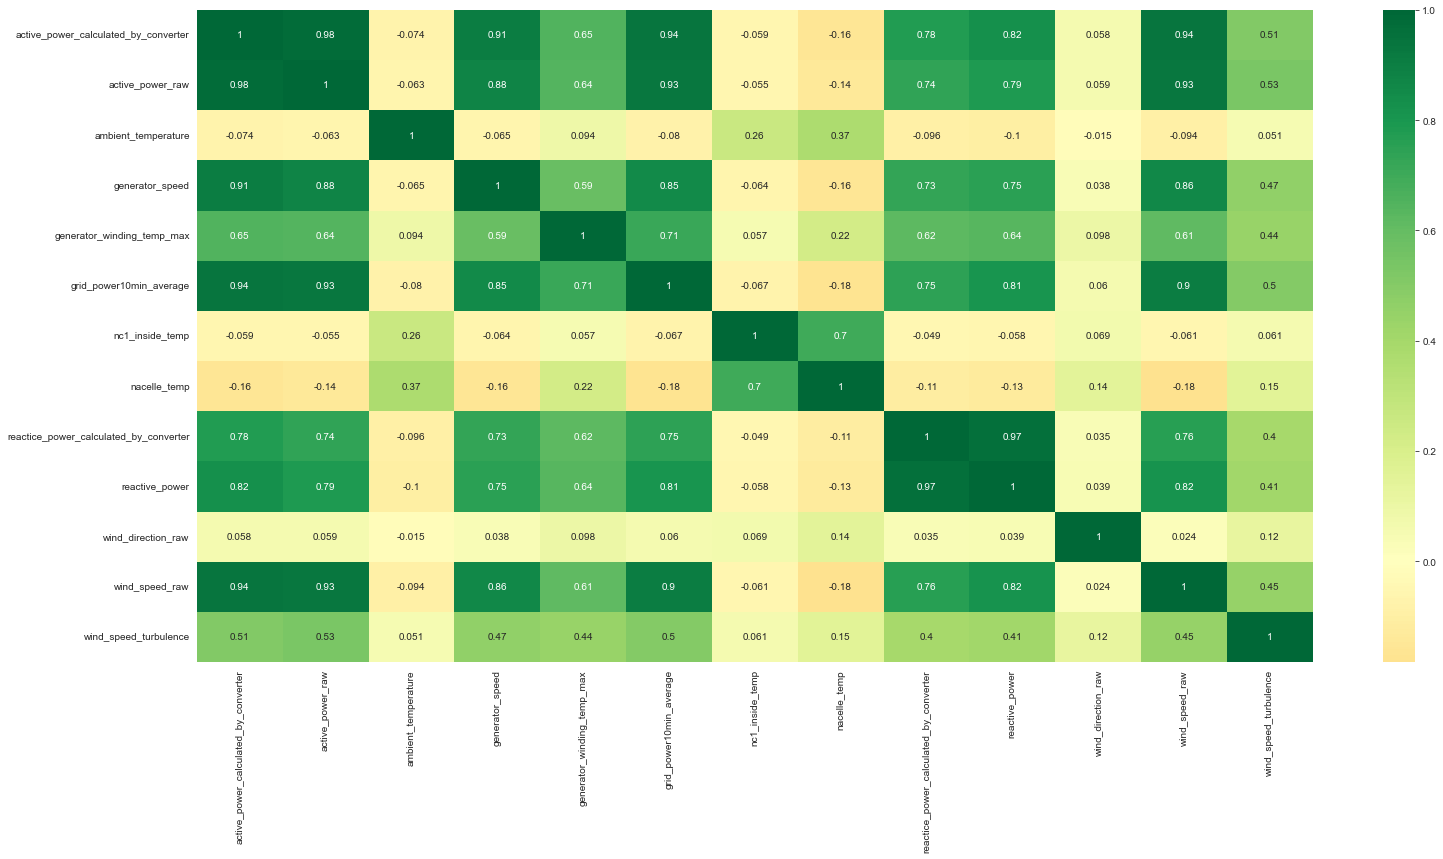

In [17]:
# Plotting a heatmap plot

#from turtle import color
#plt.figure(figsize=(25,12))
#p = sns.heatmap(data=train_num_feat.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

**VIF Check**

In [18]:
# Import VIF library for multi-collinearity check
# from statsmodels.stats.outliers_influence import variance_inflation_factor 

# def calc_vif(dataframe):

#     # calculating VIF
#     vif = pd.DataFrame()
#     vif["Variables"] = dataframe.columns
#     vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
#     vif = vif.sort_values(ascending=False, by="VIF")
#     return(vif)

# calc_vif(train_num_feat) 

,Variables,VIF
0,active_power_calculated_by_converter,38.181699
1,active_power_raw,26.281814
9,reactive_power,21.902869
8,reactice_power_calculated_by_converter,17.417872
5,grid_power10min_average,12.335362
11,wind_speed_raw,10.142883
3,generator_speed,5.853446
7,nacelle_temp,3.367055
4,generator_winding_temp_max,3.303477
6,nc1_inside_temp,2.237131


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

I will remove one column at a time, starting with the highest VIF value, and see how it impacts the other VIF values.

In [19]:
train_num_feat = train_num_feat.drop('active_power_calculated_by_converter', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
8,reactive_power,21.761528
7,reactice_power_calculated_by_converter,17.399387
0,active_power_raw,12.791395
4,grid_power10min_average,11.460072
10,wind_speed_raw,9.928776
2,generator_speed,5.029596
6,nacelle_temp,3.361302
3,generator_winding_temp_max,3.286653
5,nc1_inside_temp,2.236232
11,wind_speed_turbulence,1.577873


We can see that the VIF value of "active_power_raw" has reduced drastically. We will check removing the next variable that has the highest VIF per the table above - "reactive_power".

In [20]:
#train_num_feat = train_num_feat.drop('reactive_power', axis=1)
#calc_vif(train_num_feat)

,Variables,VIF
0,active_power_raw,12.789917
4,grid_power10min_average,11.010275
9,wind_speed_raw,9.536501
2,generator_speed,4.913811
6,nacelle_temp,3.357488
3,generator_winding_temp_max,3.282933
7,reactice_power_calculated_by_converter,2.793075
5,nc1_inside_temp,2.233780
10,wind_speed_turbulence,1.571800
1,ambient_temperature,1.177466


In [21]:
#train_num_feat = train_num_feat.drop('active_power_raw', axis=1)
#calc_vif(train_num_feat)

We can see that removing "active_power_raw" does not impact the other independent variables much. We can stop here by dropping 'active_power_calculated_by_converter' and 'reactive_power' and look at further techniques for feature selection.

In [25]:
# Importing all necessary libraries

#from math import sqrt
#import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from vecstack import stacking
#from verstack import LGBMTuner

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# creating test set of feature columns for prediction
X_test = test[feat_cols_1]

In [27]:
X_test.shape

(303202, 11)

In [28]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 11) (818643,) (90961, 11) (90961,)


**Initialize 1st level models**

In [29]:
models = [
    ExtraTreesRegressor(random_state=0, n_jobs=-1, 
                        n_estimators=100, max_depth=3),
        
    RandomForestRegressor(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3),
        
    XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                 n_estimators=100, max_depth=3)
]

In [74]:
# import optuna
# from sklearn.model_selection import StratifiedKFold, cv
# def objective(trial, X, y):
#     param_grid = {{
#         #"device_type": trial.suggest_categorical("device_type", ['gpu']),
#         "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "max_bin": trial.suggest_int("max_bin", 200, 300),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
#         "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
#         "bagging_fraction": trial.suggest_float(
#             "bagging_fraction", 0.2, 0.95, step=0.1
#         ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
#         "feature_fraction": trial.suggest_float(
#             "feature_fraction", 0.2, 0.95, step=0.1
#         ),
#     }

#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

#     for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
#         X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_val = y[train_idx], y[test_idx]

#         lgbm_model = lgb
#         lgbm_model.fit(
#             X_train,
#             y_train,
#             eval_set=[(X_val, y_val)],
#             eval_metric="MAPE",
#             early_stopping_rounds=100,
#             callbacks=[
#                 LightGBMPruningCallback(trial, "binary_logloss")
#             ],  # Add a pruning callback
#         )
#         preds = model.predict_proba(X_test)
#         cv_scores[idx] = log_loss(y_test, preds)

#     return np.mean(cv_scores)

# )


**PREDICTION**

In [81]:
# predictions = pd.DataFrame(list(final['Target']),columns=['Target'])

# #test['Target'] = rf_model.predict(X_test)
# predictions.to_csv('my_submission.csv', index=False)